In [1]:
from scipy import integrate
from scipy.optimize import fsolve
from math import pi, e, cos, sin
import numpy as np
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
#tis is only style for the plot, we can ignore or change if we want
rc_fonts = {
        "text.usetex": True,
        "font.size": 30,
        'mathtext.default': 'regular',
        'axes.titlesize': 33,
        "axes.labelsize": 33,
        "legend.fontsize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        'figure.titlesize': 33,
        'figure.figsize': (13,11),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }

plt.rcParams.update(rc_fonts)

/home/roberto/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


## Find the effective thickness of the photoevaporation flow

To calculate $h_0$  we use the equation for [r](https://github.com/will-henney/globule-seminario/issues/5#issuecomment-1438984643) and $rho$ $$\frac{\rho}{\rho_0}=e^{\frac{1-M^2}{2}}$$ and $$\frac{r}{r_0}=M^{-1/\alpha}e^{\frac{M^2-1}{2 \alpha}}$$
hence
$$\frac{dr}{dM}=r_0\Big( e^{\frac{M^2-1}{2\alpha}}\Big(-\frac{M^{-1/\alpha-1}}{\alpha}+\frac{M}{\alpha M^{1/\alpha}}\Big)\Big)=\frac{r_0}{\alpha}e^{\frac{M^2-1}{2\alpha}}\Big(M^{\frac{\alpha-1}{\alpha}}-M^{-\frac{\alpha+1}{\alpha}}\Big)$$
therefore
$$h_0=\int_0^\infty \Big(\frac{n(r)}{n_0}\Big)^2 dr=\int_1^\infty \frac{r_0}{\alpha} (exp(1-M^2))^{1-\frac{1}{2\alpha}}\Big(M^{\frac{\alpha-1}{\alpha}}-M^{-\frac{\alpha+1}{\alpha}}\Big) dM.$$

For $\alpha=2$ we have $$h_0=r_0\int_1^\infty \frac{exp(\frac{3}{4}(1-M^2))}{2}(M^{1/2}-M^{-3/2})dM$$

In [13]:
def alpha_values(alpha): #integrate in function of alpha
    function = lambda x: ((e**(1-x**2))**(1-1/(2*alpha)))*(x**((alpha-1)/alpha)-x**(-(alpha+1)/alpha))/alpha
    return(function)
 
h_0, err = integrate.quad(alpha_values(2), 1, np.inf) #alpha=2 spherical case
display(Markdown(rf'The values of $h_0/r_0$ for $\alpha=2$ is'))
display(Markdown(rf'$h_0/r_0=$'f'{h_0}'))

The values of $h_0/r_0$ for $\alpha=2$ is

$h_0/r_0=$0.12149200100709526

Now for the cylindrical case $\alpha=1$ and we have $$h_0=r_0\int_1^\infty \Big(exp(1-M^2)\big)^{1/2}\Big(1-M^{-2}\Big) dM$$

In [3]:
h_0_cyl, err = integrate.quad(alpha_values(1), 1, np.inf) #alpha=1 cylindrical case
display(Markdown(rf'The values of $h_0/r_0$ for $\alpha=1$ is'))
display(Markdown(rf'$h_0/r_0=$'f'{h_0_cyl}'))

The values of $h_0/r_0$ for $\alpha=1$ is

$h_0/r_0=$0.311359084837597

## Properties of the shocked shell for photoevaporation flow that interacts with an ambient pressure

We investigate a range of pressure contrasts $P / P_0$ between the ambient gas and the base of the photoevaporatoin flow. 

In [4]:
P_P_0_1 = [i+2 for i in range(14)]  #P/P_0 decrease to 0
Extr=[1/0.9,1/0.8,1/0.7,1/0.6]      #case when P/P_0 is near of 1
P_P_0 = 1 / np.array(Extr + P_P_0_1)
pd.DataFrame(P_P_0)#.style.format(precision=2)

,0
0,0.900000
1,0.800000
2,0.700000
3,0.600000
4,0.500000
5,0.333333
6,0.250000
7,0.200000
8,0.166667
9,0.142857


Find the Mach number of the flow at radius where the shocked shell will form, assuming that the flow ram pressure is equal to the ambient pressure. 

Now we use the pressure equation to find the mach number

$$\frac{P}{P_0}=\frac{1+M^2}{2}exp\Big(\frac{1-M^2}{2}\Big)$$

In [5]:
def func_to_find_M0(x):
    """Should be called with vector argument of same length as P_P_0"""
    return ((1+x**2)/2)*(e**((1-x**2)/2)) - P_P_0 #equation to find the root

M0 = fsolve(func_to_find_M0, 1.5 * np.ones_like(P_P_0)) 
#we find the mach number to differents ratio of P/P_0
M0

array([1.43653166, 1.62750626, 1.78737193, 1.93722551, 2.0872695 ,
       2.36189814, 2.52690899, 2.64359919, 2.73319847, 2.80555349,
       2.86601589, 2.91780729, 2.96301204, 3.00305324, 3.03894401,
       3.07143012, 3.10107584, 3.12831796])

Find the other parameters of the shocked shell: $r_1 / r_0$, $n_1 / n_0$ (density just before shock). 

The equations for $r_1$ and $\rho_1$ are $$\frac{\rho_1}{\rho_0}=e^{\frac{1-M^2}{2}}$$ and $$\frac{r_1}{r_0}=M^{-1/\alpha}e^{\frac{M^2-1}{2 \alpha}}$$

We will make numpy arrays for all the quantities that we want to calculate. The dataframe will be used only for presentation.

In [6]:
alpha=2      #spherical case
rho1 = np.exp((1-M0**2)/2)
r1 = (M0**(-1/alpha))*np.exp((M0**2-1)/(2*alpha))

In [7]:
Table1 = pd.DataFrame(
    {
        r'$P_1/P_0$': P_P_0,
        r'$M_0$': M0,
        r'$\rho_1/\rho_0$': rho1,
        r'$r_1/r_0$': r1,
    }
)
Table1#.style.format(precision = 2)

,$P_1/P_0$,$M_0$,$\rho_1/\rho_0$,$r_1/r_0$
0,0.900000,1.436532,0.587540,1.088488
1,0.800000,1.627506,0.438503,1.183729
2,0.700000,1.787372,0.333755,1.294729
3,0.600000,1.937226,0.252480,1.429868
4,0.500000,2.087270,0.186682,1.601988
5,0.333333,2.361898,0.101339,2.043998
6,0.250000,2.526909,0.067702,2.417705
7,0.200000,2.643599,0.050071,2.748578
8,0.166667,2.733198,0.039353,3.049133
9,0.142857,2.805553,0.032207,3.326705


Find the properties of the shocked shell itself (density and thickness): $n_2 / n_0$, $h_2 / h_0$. 

For density we have that in the shock shell  from $\rho_1 M_1=\rho_2M_2$, where $M_2=M_1^{-1}$, therefore
$$\frac{\rho_2}{\rho_0}=(\rho_2/\rho_1)(\rho_1/\rho_0)=M_1^2(\rho_1/\rho_0)$$

and for $h_2/h_0$ we have that in  the shock shell $h_2/r_1=\frac{3}{4M_1^2}$ hence
$$\frac{h_2}{r_0}=(h_2/r_1)(r_1/r_0)=\frac{3}{4M_1^2}\frac{r_1}{r_0}$$

In [8]:
rho2 = (M0**2)*rho1
h2 = (3/(4*M0**2)) * r1

In [9]:
Table2=pd.DataFrame()
Table2[rf'$P_1/P_0$'] = P_P_0
Table2[rf'$M_0$'] = M0
Table2[rf'$\rho_2/\rho_0$'] = rho2
Table2[rf'$h_2/r_0$'] = h2
Table2

,$P_1/P_0$,$M_0$,$\rho_2/\rho_0$,$h_2/r_0$
0,0.900000,1.436532,1.212460,0.395599
1,0.800000,1.627506,1.161497,0.335172
2,0.700000,1.787372,1.066245,0.303956
3,0.600000,1.937226,0.947520,0.285757
4,0.500000,2.087270,0.813318,0.275780
5,0.333333,2.361898,0.565327,0.274802
6,0.250000,2.526909,0.432298,0.283978
7,0.200000,2.643599,0.349929,0.294970
8,0.166667,2.733198,0.293980,0.306123
9,0.142857,2.805553,0.253507,0.316985


## Emission measure of shocked shell

This has two parts:
1. The emission measure in the radial direction, which is needed in order to know the contriibution of the recombinations in shell to the ionization balance
2. The emission measure in the tangential direction, which is proportional to the surface brightness. 

For the radial case, we have $EM_2 / EM_0 = (n_2 /  n_0)^2 (h_2 / h_0)$

In [10]:
EM2a = (rho2)**2 * h2 / h_0
EM2a

array([4.78676505, 3.72183091, 2.84430994, 2.11166761, 1.50153727,
       0.72288947, 0.43682099, 0.29729637, 0.21776325, 0.167676  ,
       0.13386463, 0.10984048, 0.09208475, 0.07854548, 0.06795595,
       0.05949741, 0.0526202 , 0.04694343])

For the tangential case, we have the following:


The emission measure is $EM=n^2\ell$ where $\ell=2(hr)^{1/2}$
and therefore the relative emission is $$\frac{EM_2}{EM_0}=\Big(\frac{n_2}{n_0}\Big)^2\frac{\ell_1}{\ell_2}$$ 
here we use that in our data $r_1$ and $\rho_1$ are normalized by $r_0$ and $\rho_0$ but for $h_2$ is normalized by $r_0$ and not by $h_0$, but in our calculation we find that $h_0\approx 0.12r_0$  hence $\frac{h_1}{r_0}=0.12(\frac{h_2}{h_0})$ and we have

In [11]:
h_0

0.12149200100709526

In [12]:
EM2=(rho2)**2*(r1*h2/h_0)**(1/2)
EM2

array([2.76758218, 2.43793721, 2.04613867, 1.64645152, 1.2614146 ,
       0.68718911, 0.44425908, 0.31632129, 0.23955154, 0.18933577,
       0.15441435, 0.12899184, 0.10981567, 0.09493523, 0.08311767,
       0.07354987, 0.06567622, 0.05910564])

## Display tall the results in a single table

In [13]:
df = pd.DataFrame(
    {
        r'$P_1/P_0$': P_P_0,
        r'$M_0$': M0,
        r'$\rho_1/\rho_0$': rho1,
        r'$r_1/r_0$': r1,
        r'$\rho_2/\rho_0$': rho2,
        r'$h_2/r_0$': h2,
        r'$E_2/E_0$': EM2a,
        r'$S_2/S_0$': EM2,
    }
)
df

,$P_1/P_0$,$M_0$,$\rho_1/\rho_0$,$r_1/r_0$,$\rho_2/\rho_0$,$h_2/r_0$,$E_2/E_0$,$S_2/S_0$
0,0.900000,1.436532,0.587540,1.088488,1.212460,0.395599,4.786765,2.767582
1,0.800000,1.627506,0.438503,1.183729,1.161497,0.335172,3.721831,2.437937
2,0.700000,1.787372,0.333755,1.294729,1.066245,0.303956,2.844310,2.046139
3,0.600000,1.937226,0.252480,1.429868,0.947520,0.285757,2.111668,1.646452
4,0.500000,2.087270,0.186682,1.601988,0.813318,0.275780,1.501537,1.261415
5,0.333333,2.361898,0.101339,2.043998,0.565327,0.274802,0.722889,0.687189
6,0.250000,2.526909,0.067702,2.417705,0.432298,0.283978,0.436821,0.444259
7,0.200000,2.643599,0.050071,2.748578,0.349929,0.294970,0.297296,0.316321
8,0.166667,2.733198,0.039353,3.049133,0.293980,0.306123,0.217763,0.239552
9,0.142857,2.805553,0.032207,3.326705,0.253507,0.316985,0.167676,0.189336


The column $E_2/E_0$ is for the perpendicular emission measure, while $S_2/S_0$ is for the tangential emission measure.

*Roberto, please make a plot of these quantities, using the shell radius as the indendent variable*. 

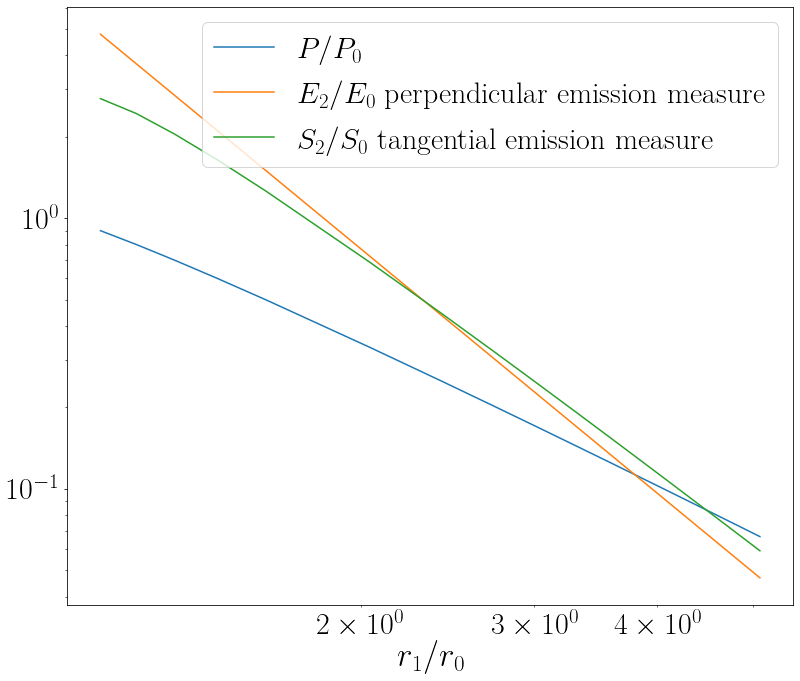

In [21]:
plt.plot(r1,P_P_0,label=r'$P/P_0$')
plt.plot(r1,EM2a,label=r'$E_2/E_0$ perpendicular emission measure ')
plt.plot(r1,EM2,label=r'$S_2/S_0$ tangential emission measure ')
#plt.plot(r1,M0,label=r'$M_0$')
#plt.plot(r1,rho1,label=r'$\rho_1/\rho_0$')
#plt.plot(r1,rho2,label=r'$\rho_2/\rho_0$')
#plt.plot(r1,h2,label=r'$h_2/r_0$')
plt.xlabel(r'$r_1/r_0$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

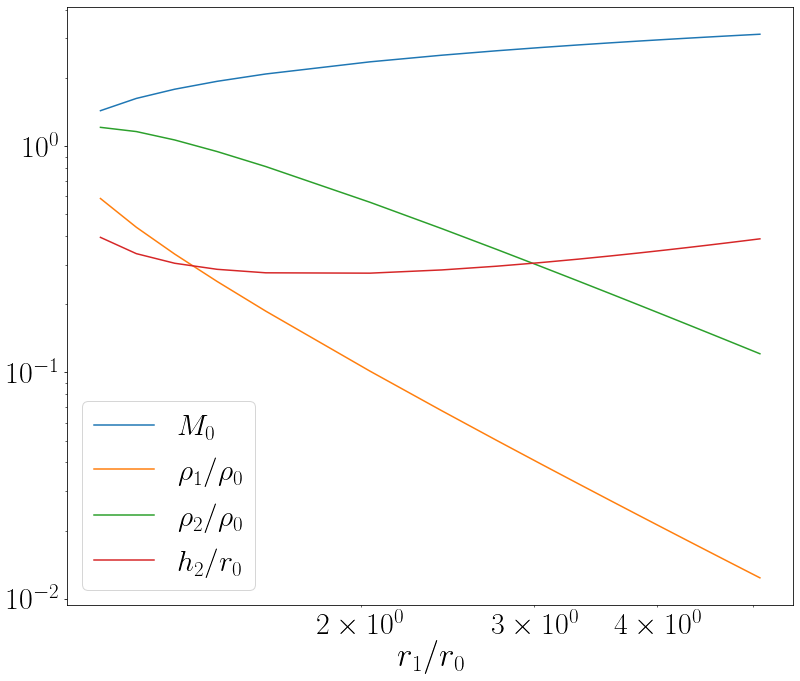

In [22]:
#plt.plot(r1,P_P_0,label=r'$P/P_0$')
#plt.plot(r1,EM2a,label=r'$E_2/E_0$ perpendicular emission measure ')
#plt.plot(r1,EM2,label=r'$S_2/S_0$ tangential emission measure ')
plt.plot(r1,M0,label=r'$M_0$')
plt.plot(r1,rho1,label=r'$\rho_1/\rho_0$')
plt.plot(r1,rho2,label=r'$\rho_2/\rho_0$')
plt.plot(r1,h2,label=r'$h_2/r_0$')
plt.xlabel(r'$r_1/r_0$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

Now we find the same values in the range (0.01,1) for $r_1/r_0$

/home/roberto/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


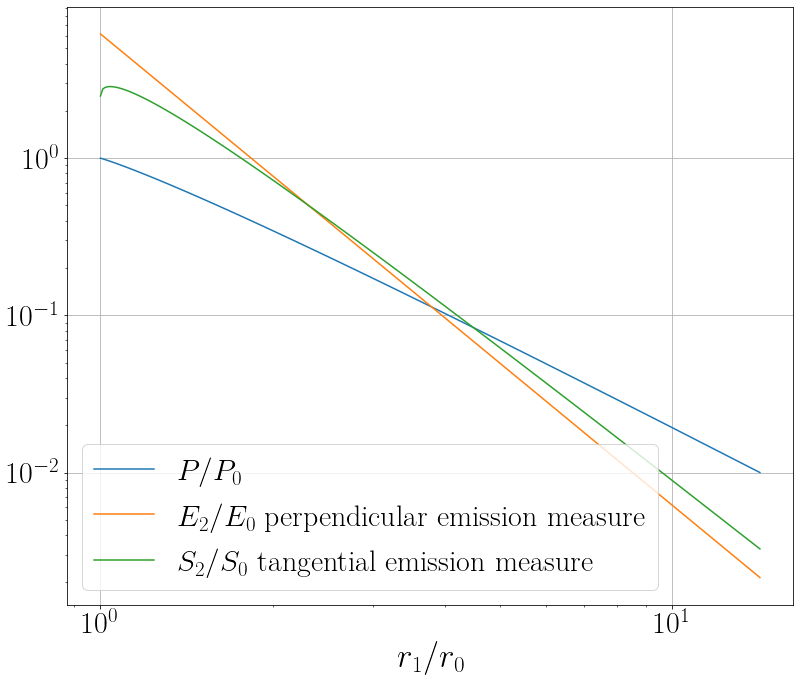

In [28]:
def find_root(x):
    """Should be called with vector argument of same length as P_P_0"""
    return ((1+x**2)/2)*(e**((1-x**2)/2)) - P_P0 #equation to find the root

#M0 = fsolve(func_to_find_M0, 1.5 * np.ones_like(P_P_0)) 

P_P0 = np.arange(0.01,1.01,0.01)
M0 = fsolve(find_root,1.5 * np.ones_like(P_P0))
alpha=2      #spherical case
rho1 = np.exp((1-M0**2)/2)
r1 = (M0**(-1/alpha))*np.exp((M0**2-1)/(2*alpha))
rho2 = (M0**2)*rho1
h2 = (3/(4*M0**2)) * r1
EM2a = (rho2)**2 * h2 / h_0
EM2=(rho2)**2*(r1*h2/h_0)**(1/2)
plt.plot(r1,P_P0,label=r'$P/P_0$')
plt.plot(r1,EM2a,label=r'$E_2/E_0$ perpendicular emission measure ')
plt.plot(r1,EM2,label=r'$S_2/S_0$ tangential emission measure ')
#plt.plot(r1,M0,label=r'$M_0$')
#plt.plot(r1,rho1,label=r'$\rho_1/\rho_0$')
#plt.plot(r1,rho2,label=r'$\rho_2/\rho_0$')
#plt.plot(r1,h2,label=r'$h_2/r_0$')
plt.xlabel(r'$r_1/r_0$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

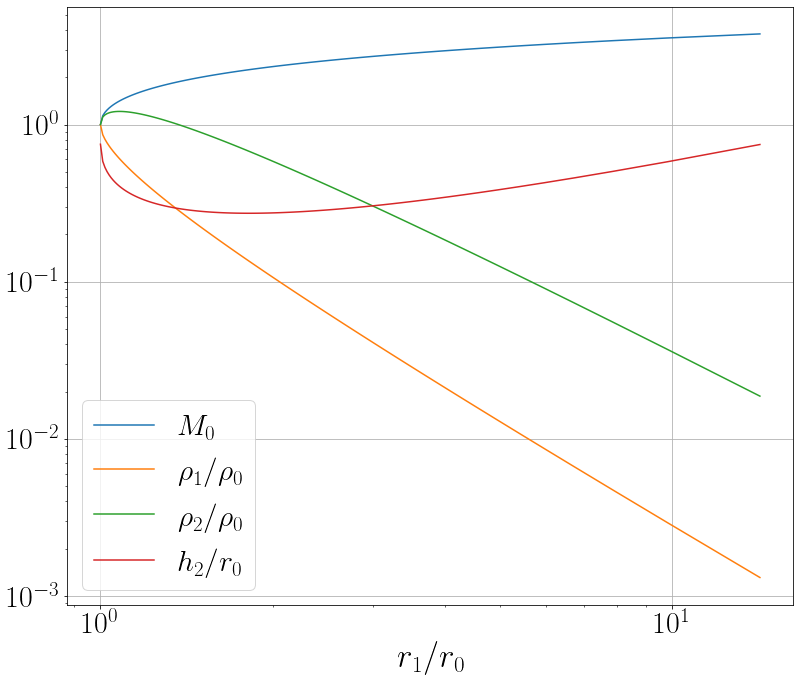

In [29]:
plt.plot(r1,M0,label=r'$M_0$')
plt.plot(r1,rho1,label=r'$\rho_1/\rho_0$')
plt.plot(r1,rho2,label=r'$\rho_2/\rho_0$')
plt.plot(r1,h2,label=r'$h_2/r_0$')
plt.xlabel(r'$r_1/r_0$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

Now we want to calculate $L$ and for this we have that
$$L=2\pi \int_{r_0}^\infty n^2(r)r^2 dr=2\pi n_0^2 r_0^2\int_1^\infty\Big(\frac{n(r)}{n_0}\Big)^2\Big(\frac{r}{r_0}\Big)^2d\frac{r}{r_0},$$

and in our calculate for $h_0$ we have that $$\frac{n(r)}{n_0}=e^{\frac{1-M^2}{2}},$$
$$\frac{r}{r_0}=M^{-1/2}e^{\frac{M^2-1}{4}}$$ and
$$d\Big(\frac{r}{r_0}\Big)=\frac{1}{2}e^{\frac{M^2-1}{4}}\Big(M^{1/2}-M^{-3/2}\Big)dM.$$

Now, if we take $$\xi_0=\int_1^\infty\Big(\frac{n(r)}{n_0}\Big)^2\Big(\frac{r}{r_0}\Big)^2d\frac{r}{r_0}$$ we can change to depence only of $M$ and the limits are the same because in $r/r_0=1\Rightarrow M=1$ and in $r/r_0=\infty\Rightarrow M=\infty$, so we have
$$\xi_0=\int_0^\infty \frac{1}{2}e^{-\frac{M^2-1}{4}}\Big(M^{-1/2}-M^{-5/2}\Big)dM$$ 
_we can obtain this result for h0, we need multiply by r/r0^2_

In [33]:
x_0, err = integrate.quad(lambda x:(1/2)*(np.exp((1-x**2)/(4)))*(x**(-1/2)-x**(-5/2)), 1, np.inf) #alpha=2 spherical case
display(Markdown(rf'The values of $x_0$ for $\alpha=2$ is'))
display(Markdown(rf'$x_0=$'f'{x_0}'))

The values of $x_0$ for $\alpha=2$ is

$x_0=$0.2291820650049779

To calculate $L_2/L_0$ we have that
$$\frac{L_2}{L_0}=\Big(\frac{n_2}{n_0}\Big)^2\Big(\frac{r_2}{r_0}\Big)^2\frac{h_2}{x_0}$$

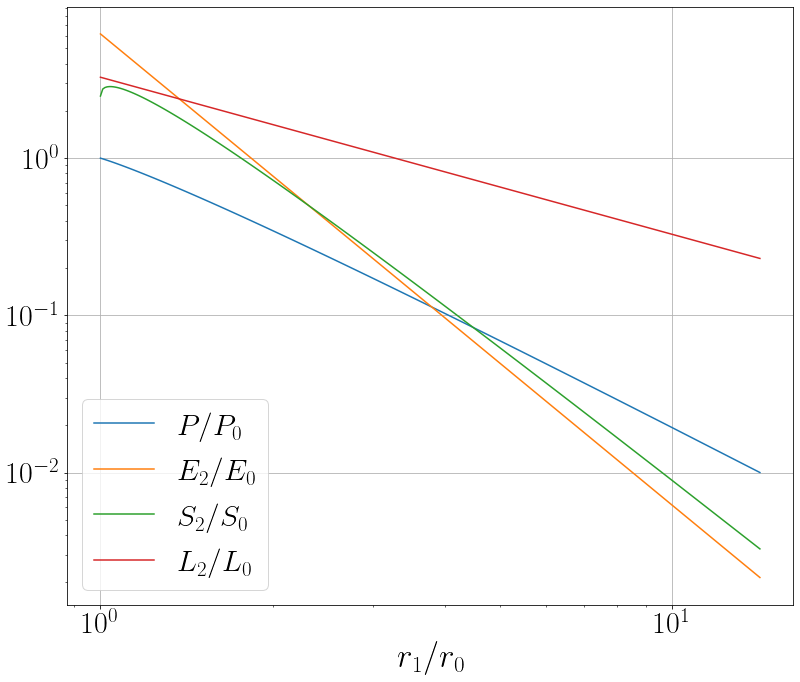

In [40]:
L2=(rho2**2)*(r1**2)*h2/x_0
plt.plot(r1,P_P0,label=r'$P/P_0$')
plt.plot(r1,EM2a,label=r'$E_2/E_0$')
plt.plot(r1,EM2,label=r'$S_2/S_0$')
plt.plot(r1,L2,label=r'$L_2/L_0$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r_1/r_0$')
plt.grid()
plt.show()